# Installing packages


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import itertools

# reading data into a datframe and creating an empty dicitionary to store results

In [72]:
merits={}
train=pd.read_csv('/Users/MAHE/Desktop/programming/machinelearning/basketball/shot_logs.csv')

# filtering data by dropping all N/A values and subsetting entries only for players- Steph Curry and Klay Thompson

In [73]:
train.dropna()
train= train[(train['player_name']=='stephen curry') | (train['player_name']=='klay thompson')]
curry_data = train[(train['player_name']=='stephen curry')]
klay_data = train[(train['player_name']=='klay thompson')]
plot_make_curry = curry_data[curry_data['FGM']==1]
plot_miss_curry = curry_data[curry_data['FGM']==0]
plot_make_klay = klay_data[klay_data['FGM']==1]
plot_miss_klay = klay_data[klay_data['FGM']==0]

## To determine better shooter overall

In [74]:
count_makes_curry=len(curry_data[curry_data['FGM']==1])
count_misses_curry=len(curry_data[curry_data['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys field goal pecentage is ",fgm_percentage_curry)
count_makes_klay=len(klay_data[klay_data['FGM']==1])
count_misses_klay=len(klay_data[klay_data['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays field goal pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['Overall shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['Overall shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]

Currys field goal pecentage is  48.553719008264466
Klays field goal pecentage is  46.240988671472714


# Early possesion shooter

14.347338345378374
Currys early shot pecentage is  51.6295025728988
Klays early shot pecentage is  47.96573875802998


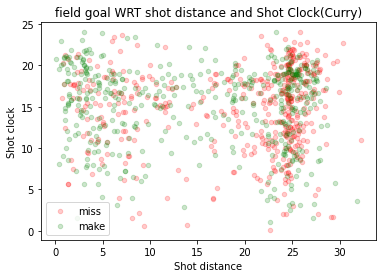

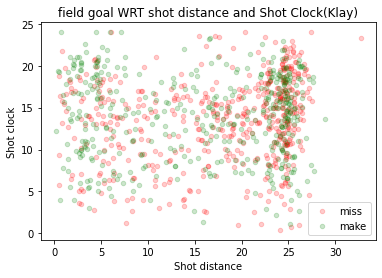

In [79]:
c_shotclk=curry_data['SHOT_CLOCK'].mean()
k_shotclk=klay_data['SHOT_CLOCK'].mean()
avg_shotclk=(c_shotclk+k_shotclk)/2
print(avg_shotclk)
curry_data_3pt=curry_data[curry_data['SHOT_CLOCK']>=avg_shotclk]
count_makes_curry=len(curry_data_3pt[curry_data_3pt['FGM']==1])
count_misses_curry=len(curry_data_3pt[curry_data_3pt['FGM']==0])
fgm_percentage_curry=(count_makes_curry/(count_makes_curry+count_misses_curry))*100
print("Currys early shot pecentage is ",fgm_percentage_curry)
klay_data_3pt=klay_data[klay_data['SHOT_CLOCK']>=avg_shotclk]
count_makes_klay=len(klay_data_3pt[klay_data_3pt['FGM']==1])
count_misses_klay=len(klay_data_3pt[klay_data_3pt['FGM']==0])
fgm_percentage_klay=(count_makes_klay/(count_makes_klay+count_misses_klay))*100
print("Klays early shot pecentage is ",fgm_percentage_klay)
if fgm_percentage_curry>fgm_percentage_klay:
    merits['early possesion shooter:']=['Stephen Curry',fgm_percentage_curry,fgm_percentage_klay]
else:
    merits['early possesion shooter:']=['Klay Thompson',fgm_percentage_curry,fgm_percentage_klay]
avg=[avg_shotclk]*30
avgx=list(range(0, 30))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.title('field goal WRT shot distance and Shot Clock(Curry)')
ax.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['SHOT_CLOCK'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['SHOT_CLOCK'],color='green',label="make",alpha=0.2,s=20)
#ax[0,0].plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Shot clock')
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plt.title('field goal WRT shot distance and closest defender(Klay)')
ax.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['SHOT_CLOCK'],color='red',label="miss",alpha=0.2,s=20)
ax.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['SHOT_CLOCK'],color='green',label="make",alpha=0.2,s=20)
#ax[0,0].plot(avgx,avg, label='Mean')
plt.title('field goal WRT shot distance and Shot Clock(Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Shot clock')
ax.legend()
plt.show()

Text(0, 0.5, 'Shot clock')

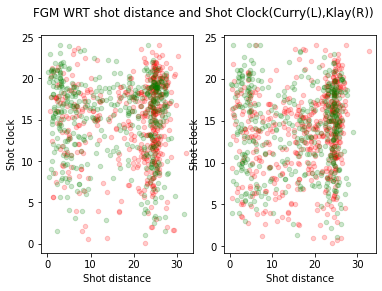

In [90]:
plt.subplot(1, 2, 1)
#plt.title('FGM WRT shot distance and Shot Clock(Curry(L),Klay(R))')
plt.suptitle('FGM WRT shot distance and Shot Clock(Curry(L),Klay(R))') 
plt.scatter(plot_miss_curry['SHOT_DIST'],plot_miss_curry['SHOT_CLOCK'],color='red',label="miss",alpha=0.2,s=20)
plt.scatter(plot_make_curry['SHOT_DIST'],plot_make_curry['SHOT_CLOCK'],color='green',label="make",alpha=0.2,s=20)
#ax[0,0].plot(avgx,avg, label='Mean')
plt.xlabel('Shot distance')
plt.ylabel('Shot clock')
plt.subplot(1, 2, 2)
plt.scatter(plot_miss_klay['SHOT_DIST'],plot_miss_klay['SHOT_CLOCK'],color='red',label="miss",alpha=0.2,s=20)
plt.scatter(plot_make_klay['SHOT_DIST'],plot_make_klay['SHOT_CLOCK'],color='green',label="make",alpha=0.2,s=20)
#ax[0,0].plot(avgx,avg, label='Mean')
#plt.title('field goal WRT shot distance and Shot Clock(Klay)')
plt.xlabel('Shot distance')
plt.ylabel('Shot clock')